# 1. Setup and Load Data 

## 1.1. Install Dependencies

In [3]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
  Using cached grpcio-1.56.2-cp310-cp310-win_amd64.whl (4.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  

In [5]:
!pip install opencv-python

  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)


In [68]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
ansi2html                     1.8.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-generator               1.10
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfi

In [1]:
# Import dependencies
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr
import random

In [2]:
# Check if there are GPUs on local machine
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [3]:
# check if there are CPUs on local machine
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# Cvoid OOM errors by setting GPU Memory Consumption Growth
#for cpu in cpus:
#    tf.config.experimental.set_memory_growth(cpu, True)

## 1.2. Check Data Format

In [5]:
# Check the directory names under `data`
os.listdir('data')

['Augmentation_Excercise',
 'Plant_leave_diseases_dataset_without_augmentation',
 'Plant_leave_diseases_dataset_with_augmentation']

In [6]:
# Create data directory containing the images for classification
data_dir = 'data\\Plant_leave_diseases_dataset_without_augmentation'
valid_formats = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
# Create a list containing the 39 different image classes
class_list = os.listdir(data_dir)
print(len(class_list))
class_list

39


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [8]:
# Create a dictionary containing the 39 different image classes with labels
labels = list(range(0, 40))
class_dict = dict(zip(labels, class_list))
class_dict

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Background_without_leaves',
 5: 'Blueberry___healthy',
 6: 'Cherry___healthy',
 7: 'Cherry___Powdery_mildew',
 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 9: 'Corn___Common_rust',
 10: 'Corn___healthy',
 11: 'Corn___Northern_Leaf_Blight',
 12: 'Grape___Black_rot',
 13: 'Grape___Esca_(Black_Measles)',
 14: 'Grape___healthy',
 15: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 16: 'Orange___Haunglongbing_(Citrus_greening)',
 17: 'Peach___Bacterial_spot',
 18: 'Peach___healthy',
 19: 'Pepper,_bell___Bacterial_spot',
 20: 'Pepper,_bell___healthy',
 21: 'Potato___Early_blight',
 22: 'Potato___healthy',
 23: 'Potato___Late_blight',
 24: 'Raspberry___healthy',
 25: 'Soybean___healthy',
 26: 'Squash___Powdery_mildew',
 27: 'Strawberry___healthy',
 28: 'Strawberry___Leaf_scorch',
 29: 'Tomato___Bacterial_spot',
 30: 'Tomato___Early_blight',
 31: 'Tomato___healthy',
 32: 'Tomato__

In [9]:
# Loop through all images without augmentation and check the image format
# This step takes quite some time to run due to the large size of the input
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            imgformat = imghdr.what(image_path)
            if imgformat not in valid_formats:
                print(f'Image format not valid: {image_path}')                
        except:
            print(f'Image loading issue: {image_path}')

**Note:** All images were successfully read in by `cv2` and with valid format.

## 1.3. Load Data

In [10]:
# There are quite a number of images in the input.
# Using batch to load in the input images is more efficient. 
batch_size = 64
image_size = (128, 128)
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size = batch_size, image_size = image_size)

Found 55448 files belonging to 39 classes.


In [11]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
# Create a numpy array data interator to check if data are loaded properly 
data_iterator = data.as_numpy_iterator()
data_iterator

In [13]:
# Create a test batch data
test_batch = data_iterator.next()

In [14]:
# Check how images are loaded as batches and in numbers in numpy array format
print(len(test_batch))
print(test_batch[0].shape)
print(test_batch[1].shape)

2
(64, 128, 128, 3)
(64,)


In [15]:
# Check images representsed as numpy arrays
test_batch[0]

array([[[[133.25, 125.25, 140.25],
         [131.75, 123.75, 138.75],
         [134.25, 126.25, 141.25],
         ...,
         [124.75, 113.75, 129.75],
         [124.  , 113.  , 129.  ],
         [124.75, 113.75, 129.75]],

        [[136.5 , 128.5 , 143.5 ],
         [129.25, 121.25, 136.25],
         [137.25, 129.25, 144.25],
         ...,
         [126.25, 115.25, 131.25],
         [122.  , 111.  , 127.  ],
         [122.5 , 111.5 , 127.5 ]],

        [[132.  , 124.  , 139.  ],
         [133.75, 125.75, 140.75],
         [128.25, 120.25, 135.25],
         ...,
         [124.25, 113.25, 129.25],
         [122.75, 111.75, 127.75],
         [128.5 , 117.5 , 133.5 ]],

        ...,

        [[148.5 , 141.5 , 157.5 ],
         [148.75, 141.75, 157.75],
         [151.5 , 144.5 , 160.5 ],
         ...,
         [ 62.5 ,  51.25,  59.25],
         [ 82.  ,  70.  ,  81.5 ],
         [ 86.75,  74.75,  86.75]],

        [[147.  , 140.  , 156.  ],
         [146.  , 139.  , 155.  ],
         [14

In [16]:
# Check image class labels reprensented as numpy array
test_batch[1]

array([ 0,  7, 32, 35, 11,  4, 29, 36,  9, 36, 26, 31, 30, 36, 36,  3, 28,
       19, 16, 31, 36, 30, 14, 19,  2, 16,  0, 11, 12, 25, 10, 35, 22,  3,
       21, 10, 19, 26, 25, 17, 27, 11,  0, 29, 21, 36, 29,  9, 34,  6, 29,
       13,  4, 38, 31, 15, 36, 11, 36, 26,  7, 25, 26,  3])

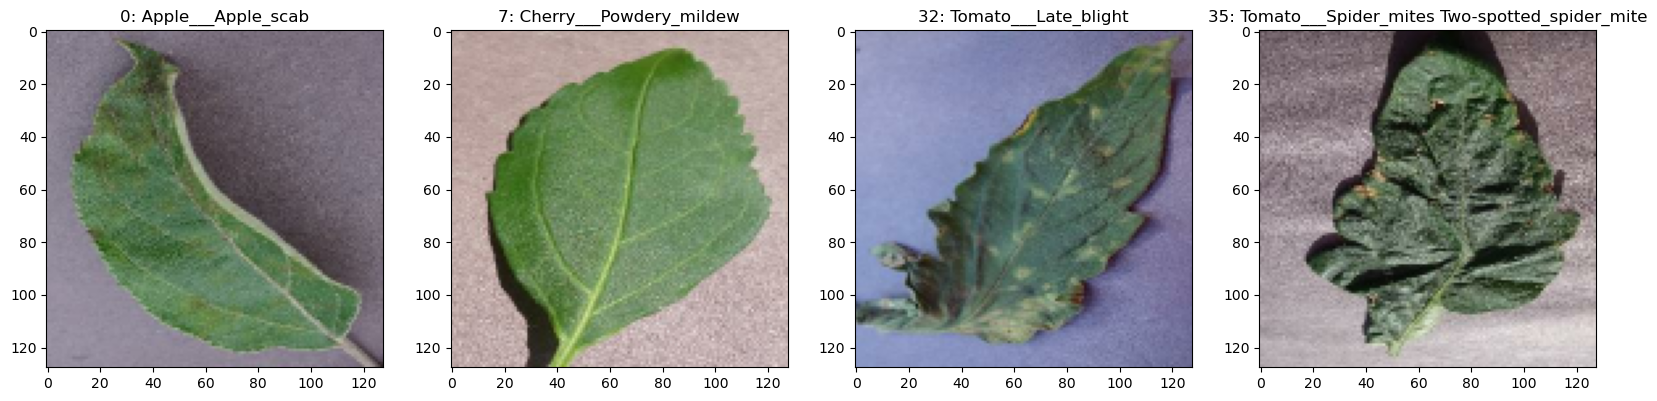

In [17]:
# Plot some images
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f'{test_batch[1][idx]}: {class_dict[test_batch[1][idx]]}')

## 1.4. Data Augmentation

### 1.4.1 Define the generator

In [18]:
# tensorflow.keras.preprocessing.image.ImageDataGenerator can not add random noise
# but can take a function as a preprocessing step
# add_noise funtion is defined here
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 15
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)  # random noise will follow a random distribution with 0 as mean and deviation as std 
    img += noise
    return img

In [20]:
# define the image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
         zca_epsilon = 1e-6,
         zca_whitening = True,
         rotation_range = 90,
         brightness_range = [0.1, 1.5],
         zoom_range = 0.1,
         fill_mode = 'nearest',
         cval = 125,
         horizontal_flip = True,
         vertical_flip = True,
         preprocessing_function = add_noise)

C:\Users\wfei2\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


**The generator can perform image augmentation with the following:**
* ZCA whitening
* rotation up to 90 degree
* brightness tuning up and tuning down
* zoom in and zoom out
* horizontal flip and vertical flip
* random noise injection

### 1.4.2. Generate images
For each class, if there are more than 1k images, then no augmentation. If there are less than 1k images, generate images until reach 1k images.

In [22]:
# define the folder for data augmentation
data_dir2 = 'data\\Plant_leave_diseases_dataset_4_augmentation'
os.listdir(data_dir2)

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 '

In [23]:
# generate images for each subfolder until there are 1k images
for img_class in os.listdir(data_dir2):
    init = len(os.listdir(os.path.join(data_dir2, img_class)))
    if init >= 1000:
        continue
    imgdata = []
    for img_name in os.listdir(os.path.join(data_dir2, img_class)):
        if (img_name.split('.')[1] == 'JPG'):
            img = cv2.imread(os.path.join(data_dir2, img_class, img_name))
            imgdata.append(img)
    x = np.array(imgdata)
    for batch in datagen.flow(x, batch_size = 32,
                         save_to_dir = os.path.join(data_dir2, img_class),
                         save_prefix = 'aug',
                         save_format = 'jpg'):
        i = len(os.listdir(os.path.join(data_dir2, img_class)))
        if i >= 1000:
            break

C:\Users\wfei2\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\wfei2\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [24]:
# check how many images there are in each subfolder after augmentation
for img_class in os.listdir(data_dir2):
    imgnum = len(os.listdir(os.path.join(data_dir2, img_class)))
    print(f'Total number of images after augmentation is {imgnum} under {os.path.join(data_dir2, img_class)}')

Total number of images after augmentation is 1014 under data\Plant_leave_diseases_dataset_4_augmentation\Apple___Apple_scab
Total number of images after augmentation is 1005 under data\Plant_leave_diseases_dataset_4_augmentation\Apple___Black_rot
Total number of images after augmentation is 1017 under data\Plant_leave_diseases_dataset_4_augmentation\Apple___Cedar_apple_rust
Total number of images after augmentation is 1645 under data\Plant_leave_diseases_dataset_4_augmentation\Apple___healthy
Total number of images after augmentation is 1143 under data\Plant_leave_diseases_dataset_4_augmentation\Background_without_leaves
Total number of images after augmentation is 1502 under data\Plant_leave_diseases_dataset_4_augmentation\Blueberry___healthy
Total number of images after augmentation is 1014 under data\Plant_leave_diseases_dataset_4_augmentation\Cherry___healthy
Total number of images after augmentation is 1052 under data\Plant_leave_diseases_dataset_4_augmentation\Cherry___Powdery_mi

In [25]:
# check how many images there are in each subfolder without augmentation
for img_class in os.listdir(data_dir):
    imgnum = len(os.listdir(os.path.join(data_dir, img_class)))
    print(f'Total number of images after augmentation is {imgnum} under {os.path.join(data_dir, img_class)}')

Total number of images after augmentation is 630 under data\Plant_leave_diseases_dataset_without_augmentation\Apple___Apple_scab
Total number of images after augmentation is 621 under data\Plant_leave_diseases_dataset_without_augmentation\Apple___Black_rot
Total number of images after augmentation is 275 under data\Plant_leave_diseases_dataset_without_augmentation\Apple___Cedar_apple_rust
Total number of images after augmentation is 1645 under data\Plant_leave_diseases_dataset_without_augmentation\Apple___healthy
Total number of images after augmentation is 1143 under data\Plant_leave_diseases_dataset_without_augmentation\Background_without_leaves
Total number of images after augmentation is 1502 under data\Plant_leave_diseases_dataset_without_augmentation\Blueberry___healthy
Total number of images after augmentation is 854 under data\Plant_leave_diseases_dataset_without_augmentation\Cherry___healthy
Total number of images after augmentation is 1052 under data\Plant_leave_diseases_data

### 1.4.3. Load images after augmentation

In [26]:
# There are quite a number of images in the input.
# Using batch to load in the input images is more efficient. 
data_aug = tf.keras.utils.image_dataset_from_directory(data_dir2, batch_size = batch_size, image_size = image_size)
data

Found 61683 files belonging to 39 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# Create a numpy array data interator to check if data are loaded properly 
data_iterator = data_aug.as_numpy_iterator()
data_iterator

In [28]:
# Create a test batch data
test_batch = data_iterator.next()
# Check how images are loaded as batches and in numbers in numpy array format
print(len(test_batch))
print(test_batch[0].shape)
print(test_batch[1].shape)

2
(64, 128, 128, 3)
(64,)


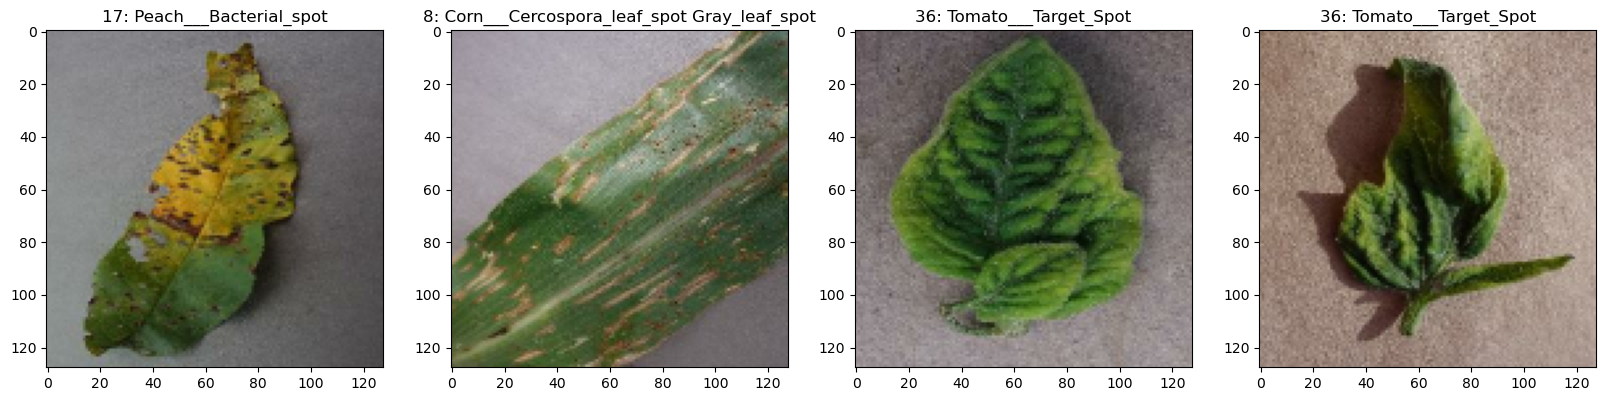

In [29]:
# Plot some images
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(f'{test_batch[1][idx]}: {class_dict[test_batch[1][idx]]}')